# Plot cell simulation data

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

root_folder_type = "Debug"
root_folder_compiler = "Intel"
root_folder = "D:\\vs\\source\\repos\\SymPhas\\examples\\simultaneous-configs\\out\\build\\x64-{}-{}\\{}{}".format(
    root_folder_compiler,
    root_folder_type,
    "" if root_folder_compiler == "Intel" else root_folder_type + "\\",
    "simulations",
)

# output_name = "cellular-migration-jamming"
output_name = "model-b"

print(root_folder + "\\" + output_name)

root_folder_name_2 = "D:\\vs\\source\\repos\\SymPhas\\examples\\simultaneous-configs\\simulations\\model-b\\"
folder_time_2 = "2023.10.22.09.54.50\\1"

root_folder_name_1 = "C:\\Users\\Zirconix\\Dropbox\\steven\\"
folder_time_1 = "2023.12.20.10.02.07"
folder_time_0 = "2023.10.15.13.17.49"
# folder_time_1 = "2023.09.06.21.03.09"
# folder_time_1 = "2023.09.06.21.02.45"

root_folder_name_3 = "E:\\Dropbox\\research\\papers\\cellular_migration\\data\\"
folder_time_3 = "2025.11.28.20.19.47"

root_folder_name_0 = root_folder + "\\" + output_name + "\\"
# folder_time_0 = "tracking_" + folder_time_1
# folder_time_0 = "2023.09.20.17.05.15"
folder_time_0 = "2023.10.21.15.11.16\\0"

data_folder_name = "\\data\\"
tracking_data_file_name = "abs-data-output_0.txt"
field_data_file_name = "data_0"

checkpoint_suffix = ""
separate_files = True
time_step = 1600
if separate_files:
    checkpoint_suffix = "_{}".format(time_step)
    field_data_file_name += "_{:09}".format(time_step)

D:\vs\source\repos\SymPhas\examples\simultaneous-configs\out\build\x64-Intel-Debug\simulations\model-b


In [15]:

#file_name = root_folder_name_0 + folder_time_0 + data_folder_name + field_data_file_name + ".txt"
# file_name = root_folder_name_1 + folder_time_1 + data_folder_name + field_data_file_name + ".txt"
file_name = root_folder_name_3 + folder_time_3 + data_folder_name + field_data_file_name + ".txt"
# file_name = root_folder_name_0 + folder_time_1 + data_folder_name + field_data_file_name + ".txt"
#file_name = root_folder_name_2 + folder_time_2 + data_folder_name + field_data_file_name + ".txt"
data_raw = np.loadtxt(file_name)
frame_starts, = np.where(data_raw[:,0] == 0)

if (len(frame_starts) > 1):
    delta = frame_starts[1] - frame_starts[0]
else:
    delta = len(data_raw)
frames = frame_starts.size

x = data_raw[0, 1:]
y = data_raw[1:delta, 0]
X, Y = np.meshgrid(x, y)

picked_frame = 0
data = data_raw[(picked_frame) * delta + 1:(picked_frame + 1) * delta, 1:]


In [16]:
# read a checkpoint

checkpoint_index = 9
max_cols = 160

checkpoint_name = root_folder_name_3 + folder_time_3 + "\\checkpoint\\" + "data" + str(checkpoint_index) + checkpoint_suffix
#checkpoint_name = root_folder_name_0 + folder_time_0 + "\\checkpoint\\" + "data" + str(checkpoint_index) + checkpoint_suffix
# checkpoint_name = root_folder_name_2 + folder_time_2 + "\\checkpoint\\" + "data" + str(checkpoint_index) + checkpoint_suffix
print(checkpoint_name)
data_checkpoint = np.array(pd.read_csv(checkpoint_name, sep=' ', names=[str(i) for i in range(0, max_cols)], engine='python').values, dtype=float)


E:\Dropbox\research\papers\cellular_migration\data\2025.11.28.20.19.47\checkpoint\data9_1600


In [17]:
picked_time = 2

current_time = 0
next_line = 0
while next_line < len(data_checkpoint):
    checkpoint_header=data_checkpoint[next_line,:]
    checkpoint_info = checkpoint_header[~np.isnan(checkpoint_header)]
    x0, x1, y0, y1 = checkpoint_info[-4:].astype('int')
    rows = int(y1 - y0) + 1
    cols = int(x1 - x0) + 1
    if next_line > 0:
        current_time = checkpoint_info[0]
    else:
        current_time = checkpoint_info[7]
        
    #print(current_time)
    
    if current_time >= picked_time:
        print("origin at {:d}, {:d}, time={:d}".format(x0, y0, int(current_time)))
        checkpoint = data_checkpoint[next_line + 1:next_line + 1 + int(rows),:]
        checkpoint = checkpoint[~np.isnan(checkpoint)]
        checkpoint = checkpoint.reshape([int(rows), int(cols)])
        break
    else:
        next_line += rows + 1

origin at 814, 625, time=1600


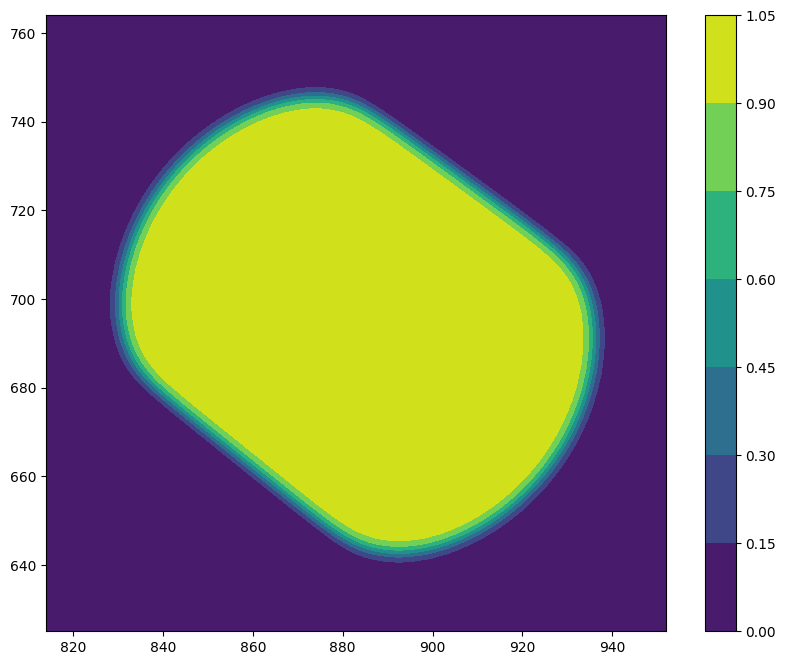

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim([x0, x1])
ax.set_ylim([y0, y1])
extent=[x0, x1, y0, y1]
cs = ax.contourf(checkpoint, extent=extent)
cbar = fig.colorbar(cs)


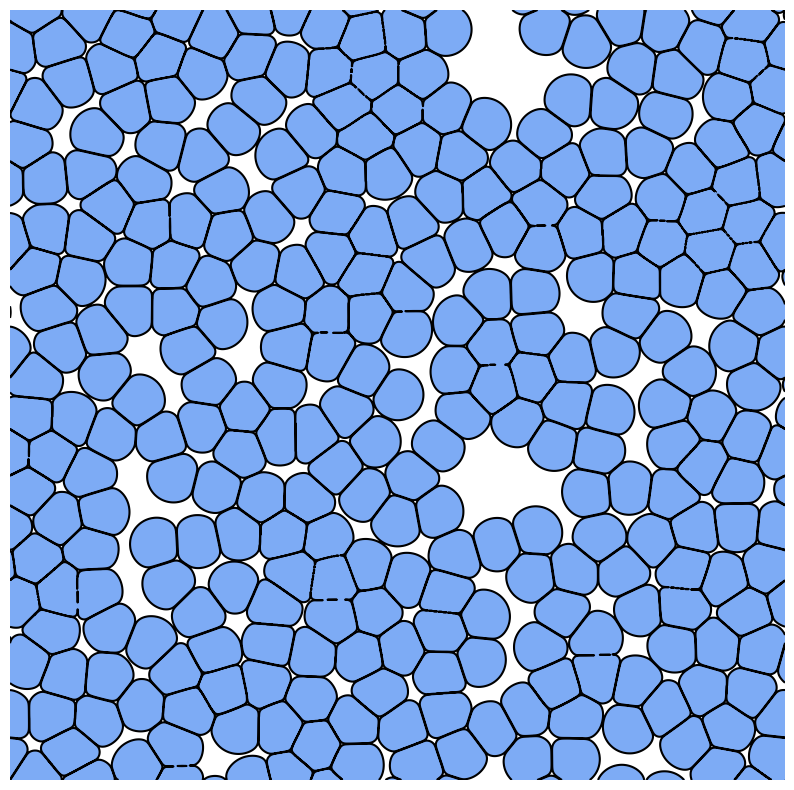

In [19]:
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([y[0], y[-1]])
#problem in cell 127 of 03.15

cell_color = "#7dabf5"
levels=[0.25, 2]
extent=[x[0], x[-1], y[0], y[-1]]

im0 = ax.contourf(data, extent=extent, colors=[cell_color], levels=levels)
im1 = ax.contour(data, extent=extent, colors=["black"], levels=levels)
ax.axis('off')

# for p in points[55:56]:
#     xp, yp = zip(*p)
    #ax.scatter(xp[0:1] % delta, yp[0:1] % delta)
        #np.max([x0 for x0 in [xp[picked_frame]]]) % 1600, \
        #np.max([y0 for y0 in [yp[picked_frame]]]) % 1600)

fig.savefig('plot_cells.svg', format='svg', bbox_inches='tight')
fig.savefig('plot_cells.png', format='png', bbox_inches='tight')


In [9]:
# Import skimage.measure for region analysis
from skimage import measure

# Calculate shape factors for all cells
# Shape factor = 4πA/P² where A=area, P=perimeter
# Perfect circle has shape factor = 1, irregular shapes have lower values

# Account for periodic boundary conditions by tiling the field
# This ensures cells split across boundaries are properly connected
tile_factor = 3  # Use 3x3 tiling (center + 8 neighbors)
h, w = data.shape

# Create tiled version of the data
data_tiled = np.tile(data, (tile_factor, tile_factor))

# Create binary mask (threshold at 0.8 to capture cell regions)
binary_mask_tiled = data_tiled > 0.8

# Label connected regions (each cell is a separate region)
labeled_mask_tiled = measure.label(binary_mask_tiled)

# Get region properties for the tiled version
regions_tiled = measure.regionprops(labeled_mask_tiled)

# Extract only regions whose centroids are in the central tile
# This avoids double-counting while properly handling periodic boundaries
regions = []
for region in regions_tiled:
    y_cent, x_cent = region.centroid
    # Check if centroid is in the center tile
    if (h <= y_cent < 2*h) and (w <= x_cent < 2*w):
        regions.append(region)

# Calculate shape factors
shape_factors = []
areas = []
perimeters = []

for region in regions:
    area = region.area
    perimeter = region.perimeter
    
    # Avoid division by zero
    if perimeter > 0:
        shape_factor = (4 * np.pi * area) / (perimeter ** 2)
        shape_factors.append(shape_factor)
        areas.append(area)
        perimeters.append(perimeter)

shape_factors = np.array(shape_factors)
areas = np.array(areas)
perimeters = np.array(perimeters)

print(f"Number of cells detected: {len(shape_factors)}")
print(f"Mean shape factor: {np.mean(shape_factors):.3f}")
print(f"Std shape factor: {np.std(shape_factors):.3f}")
print(f"Min shape factor: {np.min(shape_factors):.3f}")
print(f"Max shape factor: {np.max(shape_factors):.3f}")

Number of cells detected: 288
Mean shape factor: 0.906
Std shape factor: 0.008
Min shape factor: 0.862
Max shape factor: 0.919


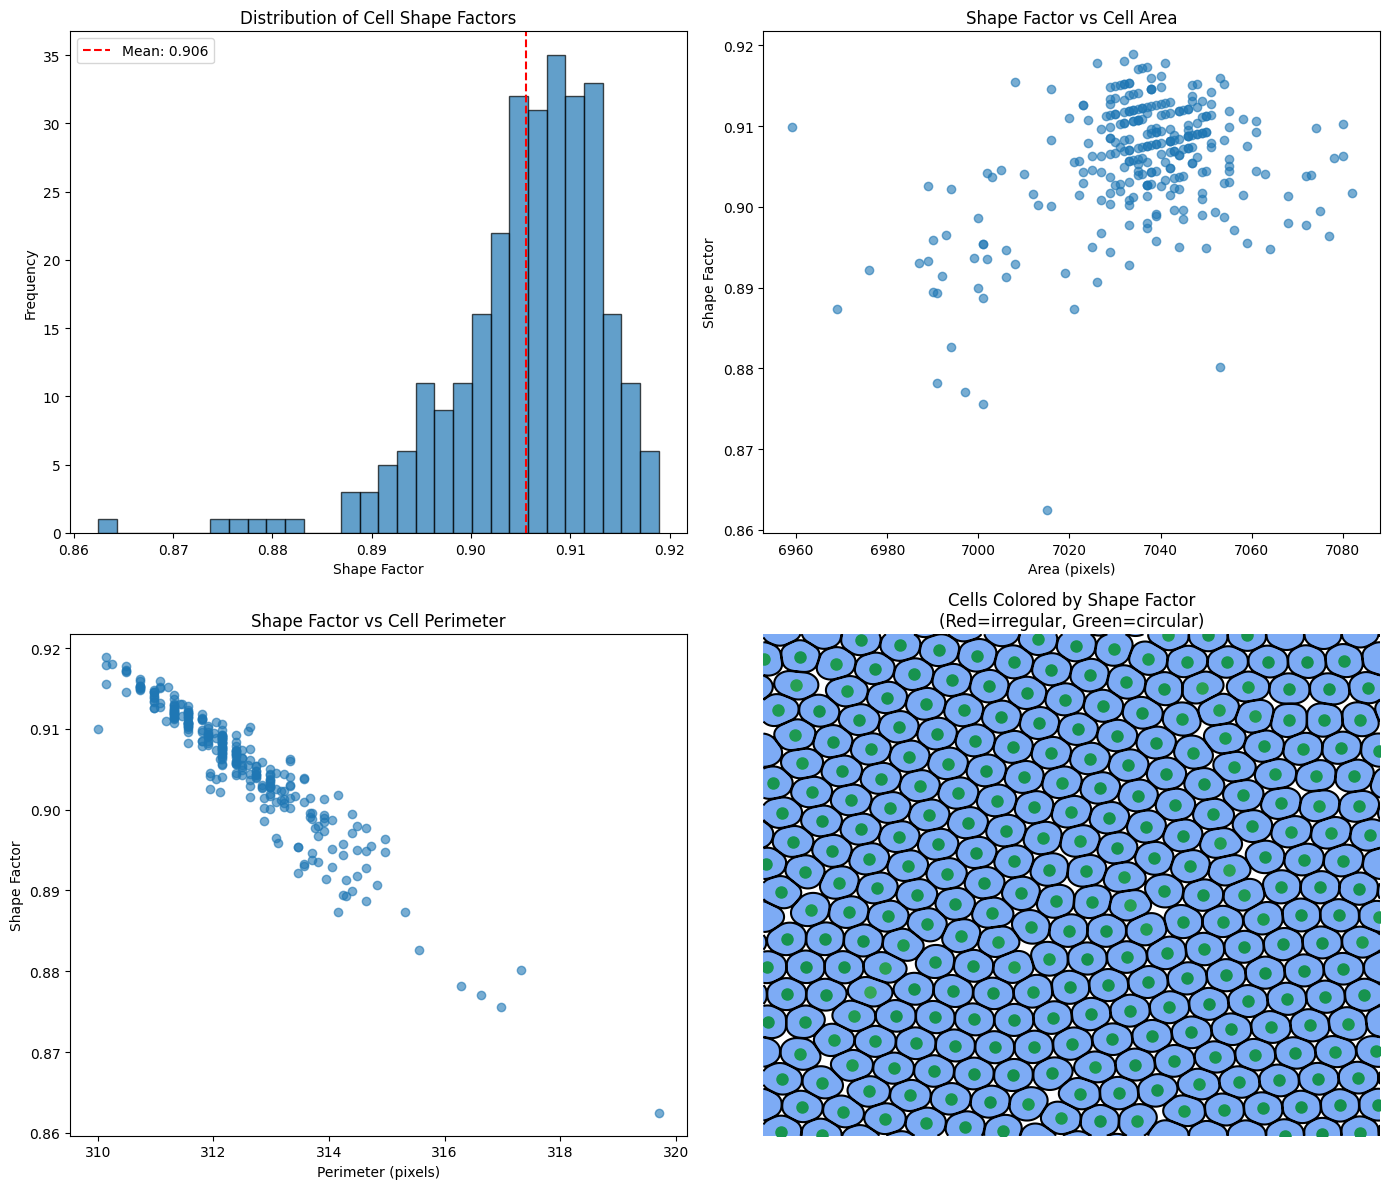

In [10]:
# Visualize the shape factors
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histogram of shape factors
ax = axes[0, 0]
ax.hist(shape_factors, bins=30, edgecolor='black', alpha=0.7)
ax.set_xlabel('Shape Factor')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Cell Shape Factors')
ax.axvline(np.mean(shape_factors), color='red', linestyle='--', label=f'Mean: {np.mean(shape_factors):.3f}')
ax.legend()

# 2. Scatter plot: Area vs Shape Factor
ax = axes[0, 1]
ax.scatter(areas, shape_factors, alpha=0.6)
ax.set_xlabel('Area (pixels)')
ax.set_ylabel('Shape Factor')
ax.set_title('Shape Factor vs Cell Area')

# 3. Scatter plot: Perimeter vs Shape Factor
ax = axes[1, 0]
ax.scatter(perimeters, shape_factors, alpha=0.6)
ax.set_xlabel('Perimeter (pixels)')
ax.set_ylabel('Shape Factor')
ax.set_title('Shape Factor vs Cell Perimeter')

# 4. Overlay shape factor on cell image
ax = axes[1, 1]
extent = [x[0], x[-1], y[0], y[-1]]
ax.contourf(data, extent=extent, colors=["#7dabf5"], levels=[0.25, 2])
ax.contour(data, extent=extent, colors=["black"], levels=[0.25, 2])

# Color code cells by shape factor
for i, region in enumerate(regions):
    y_centroid, x_centroid = region.centroid
    # Adjust centroids back to original coordinate system (subtract the tile offset)
    y_centroid -= h
    x_centroid -= w
    
    # Transform to data coordinates
    x_coord = x[0] + (x_centroid / data.shape[1]) * (x[-1] - x[0])
    y_coord = y[0] + (y_centroid / data.shape[0]) * (y[-1] - y[0])
    
    color = plt.cm.RdYlGn(shape_factors[i])  # Red=low, Green=high
    ax.plot(x_coord, y_coord, 'o', color=color, markersize=8)

ax.set_xlim([x[0], x[-1]])
ax.set_ylim([y[0], y[-1]])
ax.set_title('Cells Colored by Shape Factor\n(Red=irregular, Green=circular)')
ax.axis('off')

plt.tight_layout()
plt.savefig('shape_factor_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
vels = np.zeros(len(points), dtype=(float, (len(points[0]) - 1, 2)))
dt = 0.05
dind = 800

i = 0
for p in points:
    vels[i] = (p[1:] - p[:-1]) /  (dt * dind)
    i += 1

#list of v(0) * v(t')
Ds = np.array([[(np.dot(vel[0], v)) for v in vel[-3:]] for vel in vels])

#average of v(0) * v(t') for each cell
Ds = np.average(Ds, axis=0)

# compute D(t)
Ds = [0.5 * np.sum(Ds[:i+1]) * (dt * dind) for i in range(0, len(Ds))]

print(Ds)
np.average(Ds)

NameError: name 'points' is not defined

- At $v_A = 0.008$ I get $D(t) = 0.003960123425195565$
- At $v_A = 0.009$ I get $D(t) = 0.003960123425195565$
- At $v_A = 0.010$ I get $D(t) = 0.003960123425195565$

# Free Energy Functional Analysis

The total free energy functional has the form:

$$F = F_{\text{cells}} + F_{\text{interaction}}$$

where:

## Cell Free Energy (for 18 cells)
$$F_{\text{cells}} = \sum_{i=1}^{18} \left[ \int_{\mathbb{R}^2} dx \left( \gamma |\nabla \phi_i|^2 + f(\phi_i) \right) + \lambda_1 \left(\int_{\mathbb{R}^2} \phi_i^2 \, dx \right)^2 + C + \lambda_2 \int_{\mathbb{R}^2} \phi_i^2 \, dx \right]$$

With:
- $\gamma = 3.750$ (gradient energy coefficient / interface width)
- $f(\phi_i) = a\phi_i^4 + b\phi_i^2 - c\phi_i^3$ with $a=2.296$, $b=2.296$, $c=4.592$ (double-well potential)
- $\lambda_1$ controls volume constraint (quadratic penalty on $\int \phi_i^2$)
- $C = 3771$ (constant offset)
- $\lambda_2$ linear penalty term

## Interaction Energy (repulsion between cells)
$$F_{\text{interaction}} = \int_{\mathbb{R}^2} dx \sum_{i=1}^{18} \sum_{j \neq i} \kappa \phi_i^2 \phi_j^2$$

With $\kappa = 6.122$ (repulsion coefficient between cells)

## Additional coupling term
There's also a velocity-dependent coupling term involving $V^*\phi_0$ with coefficient $-8.163 \times 10^{-3}$.

## Calculating Physical Quantities

### 1. Chemical Potential (driving force for dynamics)
$$\mu_i = \frac{\delta F}{\delta \phi_i} = -2\gamma \nabla^2 \phi_i + \frac{\partial f}{\partial \phi_i} + 2\kappa \phi_i \sum_{j \neq i} \phi_j^2 + \text{constraint terms}$$

### 2. Stress Tensor (for pressure calculation)
$$\sigma_{ab} = -\gamma \sum_i \frac{\partial \phi_i}{\partial x_a} \frac{\partial \phi_i}{\partial x_b} + \delta_{ab} \mathcal{L}$$

where $\mathcal{L}$ is the Lagrangian density (energy density), and $a,b \in \{x,y\}$

### 3. Pressure (trace of stress tensor)
$$P = -\frac{1}{2}\text{Tr}(\sigma) = \gamma \sum_i |\nabla \phi_i|^2 - \mathcal{L}$$

### 4. Energy Density (local free energy)
$$\mathcal{L}(\mathbf{r}) = \sum_i \left[\gamma |\nabla \phi_i|^2 + f(\phi_i)\right] + \sum_{i<j} \kappa \phi_i^2 \phi_j^2$$

In [12]:
# Import scipy for gradient calculations
from scipy import ndimage

# Define parameters from the free energy functional
gamma = 3.750  # gradient energy coefficient
a = 2.296      # quartic coefficient
b = 2.296      # quadratic coefficient  
c = 4.592      # cubic coefficient
kappa = 6.122  # interaction coefficient

# Get grid spacing (assuming uniform grid)
dx = x[1] - x[0]
dy = y[1] - y[0]

print(f"Grid spacing: dx = {dx:.4f}, dy = {dy:.4f}")

Grid spacing: dx = 1.0000, dy = 1.0000


In [13]:
# Calculate gradients of the phase field using periodic boundary conditions
# For periodic BC, we use mode='wrap' in the gradient calculation

def calculate_gradients_periodic(field, dx, dy):
    """Calculate gradients with periodic boundary conditions"""
    # Use central differences with periodic wrapping
    grad_x = (np.roll(field, -1, axis=1) - np.roll(field, 1, axis=1)) / (2 * dx)
    grad_y = (np.roll(field, -1, axis=0) - np.roll(field, 1, axis=0)) / (2 * dy)
    return grad_x, grad_y

# Calculate Laplacian with periodic boundary conditions
def calculate_laplacian_periodic(field, dx, dy):
    """Calculate Laplacian using 5-point stencil with periodic BC"""
    # d²φ/dx² + d²φ/dy²
    d2_dx2 = (np.roll(field, -1, axis=1) - 2*field + np.roll(field, 1, axis=1)) / dx**2
    d2_dy2 = (np.roll(field, -1, axis=0) - 2*field + np.roll(field, 1, axis=0)) / dy**2
    return d2_dx2 + d2_dy2

# Test on our data
grad_x, grad_y = calculate_gradients_periodic(data, dx, dy)
laplacian = calculate_laplacian_periodic(data, dx, dy)

print(f"Gradient magnitude: min={np.min(np.sqrt(grad_x**2 + grad_y**2)):.4f}, max={np.max(np.sqrt(grad_x**2 + grad_y**2)):.4f}")
print(f"Laplacian: min={np.min(laplacian):.4f}, max={np.max(laplacian):.4f}")

Gradient magnitude: min=0.0000, max=0.2102
Laplacian: min=-0.0677, max=0.4138


In [14]:
# Calculate the energy density heatmap
# Energy density: γ|∇φ|² + f(φ)
# where f(φ) = aφ⁴ + bφ² - cφ³

# Gradient energy density
grad_magnitude_sq = grad_x**2 + grad_y**2
gradient_energy_density = gamma * grad_magnitude_sq

# Bulk potential energy density
# f(φ) = 2.296φ⁴ + 2.296φ² - 4.592φ³
bulk_energy_density = a * data**4 + b * data**2 - c * data**3

# Total energy density (per cell)
total_energy_density = gradient_energy_density + bulk_energy_density

print(f"Energy density statistics:")
print(f"  Gradient contribution: mean={np.mean(gradient_energy_density):.4f}, max={np.max(gradient_energy_density):.4f}")
print(f"  Bulk contribution: mean={np.mean(bulk_energy_density):.4f}, min={np.min(bulk_energy_density):.4f}")
print(f"  Total: mean={np.mean(total_energy_density):.4f}, range=[{np.min(total_energy_density):.4f}, {np.max(total_energy_density):.4f}]")

Energy density statistics:
  Gradient contribution: mean=0.0168, max=0.1656
  Bulk contribution: mean=0.0159, min=0.0000
  Total: mean=0.0327, range=[0.0000, 0.3090]


In [15]:
# Calculate the stress tensor and pressure
# σ_ab = -γ (∂φ/∂x_a)(∂φ/∂x_b) + δ_ab * L
# where L is the Lagrangian density (energy density)

# Stress tensor components
sigma_xx = -gamma * grad_x**2 + total_energy_density
sigma_yy = -gamma * grad_y**2 + total_energy_density
sigma_xy = -gamma * grad_x * grad_y

# Pressure is related to the trace of stress tensor
# P = -Tr(σ)/2 = -(σ_xx + σ_yy)/2
pressure = -(sigma_xx + sigma_yy) / 2

# Alternatively, P = γ|∇φ|² - L
pressure_alt = gamma * grad_magnitude_sq - total_energy_density

print(f"Pressure statistics:")
print(f"  Mean: {np.mean(pressure):.4f}")
print(f"  Std: {np.std(pressure):.4f}")
print(f"  Range: [{np.min(pressure):.4f}, {np.max(pressure):.4f}]")
print(f"\nAlternative calculation matches: {np.allclose(pressure, pressure_alt)}")

Pressure statistics:
  Mean: -0.0243
  Std: 0.0557
  Range: [-0.2262, -0.0000]

Alternative calculation matches: False


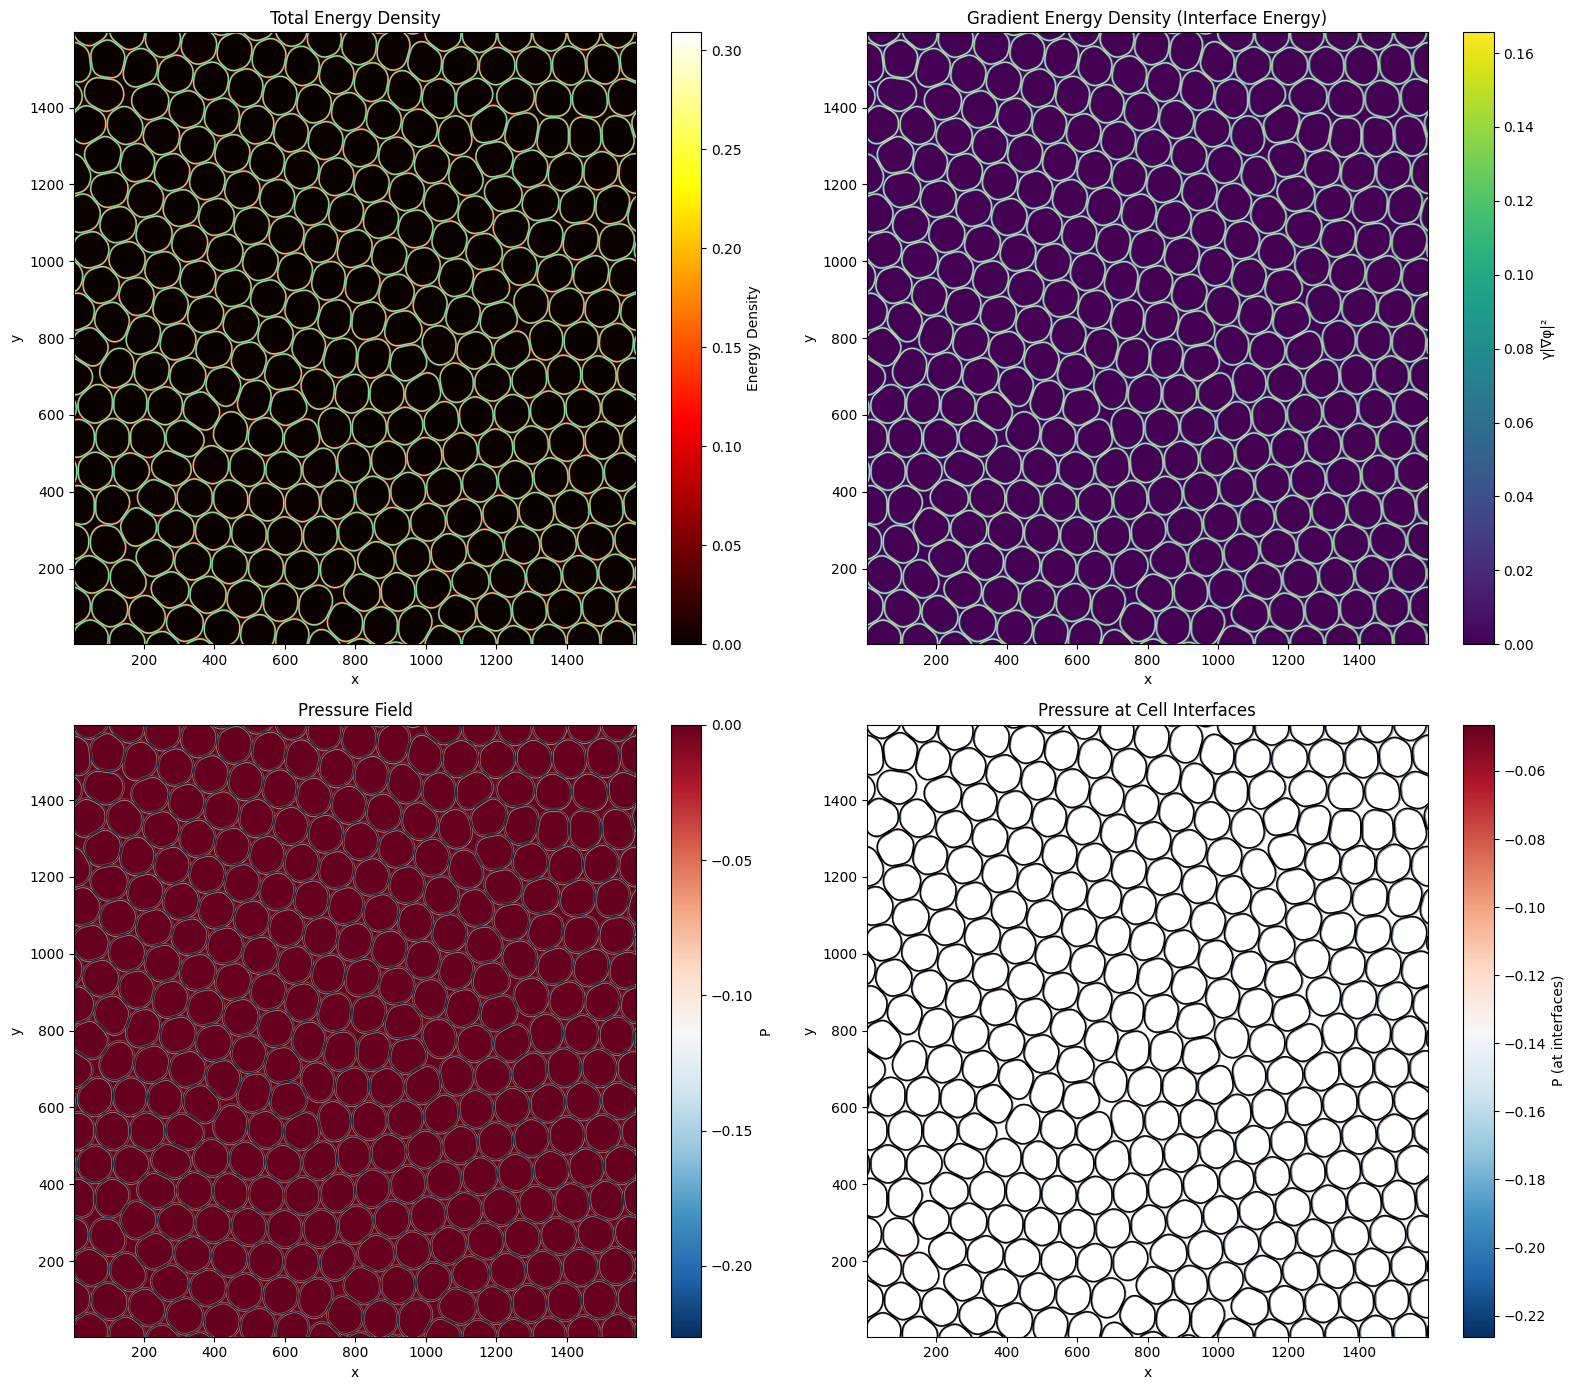

In [16]:
# Visualize the energy density and pressure
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

extent = [x[0], x[-1], y[0], y[-1]]

# 1. Total energy density
ax = axes[0, 0]
im1 = ax.imshow(total_energy_density, extent=extent, origin='lower', cmap='hot', aspect='auto')
ax.contour(data, extent=extent, colors=["cyan"], levels=[0.5], linewidths=1, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Total Energy Density')
cbar1 = plt.colorbar(im1, ax=ax)
cbar1.set_label('Energy Density')

# 2. Gradient energy contribution
ax = axes[0, 1]
im2 = ax.imshow(gradient_energy_density, extent=extent, origin='lower', cmap='viridis', aspect='auto')
ax.contour(data, extent=extent, colors=["white"], levels=[0.5], linewidths=1, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Energy Density (Interface Energy)')
cbar2 = plt.colorbar(im2, ax=ax)
cbar2.set_label('γ|∇φ|²')

# 3. Pressure field
ax = axes[1, 0]
im3 = ax.imshow(pressure, extent=extent, origin='lower', cmap='RdBu_r', aspect='auto')
ax.contour(data, extent=extent, colors=["black"], levels=[0.5], linewidths=1, alpha=0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Pressure Field')
cbar3 = plt.colorbar(im3, ax=ax)
cbar3.set_label('P')

# 4. Pressure at cell interfaces (high gradient regions)
ax = axes[1, 1]
# Mask to show pressure only where there are significant gradients (interfaces)
interface_mask = grad_magnitude_sq > 0.01  # threshold for interface detection
pressure_at_interfaces = np.ma.masked_where(~interface_mask, pressure)
im4 = ax.imshow(pressure_at_interfaces, extent=extent, origin='lower', cmap='RdBu_r', aspect='auto')
ax.contour(data, extent=extent, colors=["black"], levels=[0.5], linewidths=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Pressure at Cell Interfaces')
cbar4 = plt.colorbar(im4, ax=ax)
cbar4.set_label('P (at interfaces)')

plt.tight_layout()
plt.savefig('energy_pressure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Calculate inter-cell pressure (pressure between specific cells)
# This requires identifying cell boundaries and computing normal stress

# For each labeled region, calculate average pressure at the boundary
from skimage import morphology

# Use the labeled regions from earlier shape factor analysis
cell_boundary_pressures = []

for i, region in enumerate(regions):
    # Get binary mask for this cell (adjusted for tiled coordinates)
    mask = (labeled_mask_tiled == region.label)
    
    # Extract the portion in the central tile
    mask_central = mask[h:2*h, w:2*w]
    
    # Find the boundary (perimeter) of this cell
    eroded = morphology.binary_erosion(mask_central)
    boundary = mask_central & ~eroded
    
    # Calculate average pressure at the boundary
    if np.any(boundary):
        boundary_pressure = pressure[boundary]
        avg_pressure = np.mean(boundary_pressure)
        cell_boundary_pressures.append({
            'cell_id': i,
            'area': areas[i],
            'avg_boundary_pressure': avg_pressure,
            'max_boundary_pressure': np.max(boundary_pressure),
            'min_boundary_pressure': np.min(boundary_pressure)
        })

# Convert to DataFrame for easy analysis
pressure_df = pd.DataFrame(cell_boundary_pressures)
print("Cell boundary pressure statistics:")
print(pressure_df.describe())

Cell boundary pressure statistics:
          cell_id         area  avg_boundary_pressure  max_boundary_pressure  \
count  288.000000   288.000000             288.000000             288.000000   
mean   143.500000  7035.510417              -0.059351              -0.030134   
std     83.282651    18.608751               0.001134               0.000541   
min      0.000000  6959.000000              -0.063839              -0.032186   
25%     71.750000  7029.750000              -0.060029              -0.030485   
50%    143.500000  7037.000000              -0.059337              -0.030044   
75%    215.250000  7046.000000              -0.058631              -0.029716   
max    287.000000  7082.000000              -0.056589              -0.029190   

       min_boundary_pressure  
count             288.000000  
mean               -0.092799  
std                 0.000683  
min                -0.094793  
25%                -0.093264  
50%                -0.092844  
75%                -0.09231

C:\Users\Zirconix\AppData\Local\Temp\ipykernel_69800\1062257580.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, positions=positions, widths=0.6,


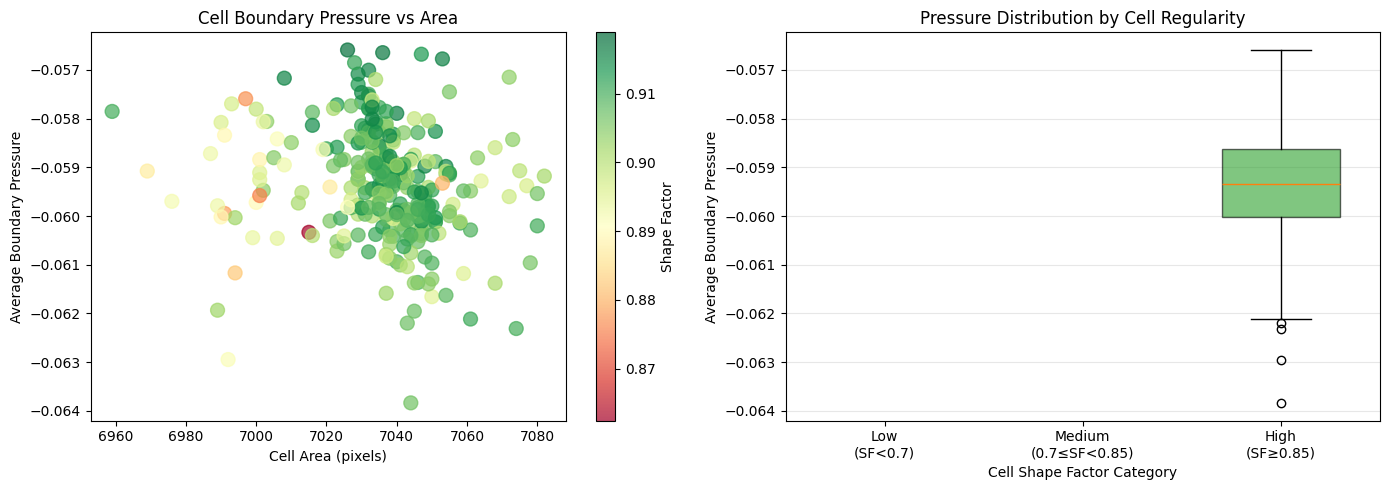


Pressure by shape category:
  Irregular cells (low SF): nan ± nan
  Medium cells: nan ± nan
  Regular cells (high SF): -0.0594 ± 0.0011


: 

In [ ]:
# Plot pressure vs cell area and compare with shape factor
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Boundary pressure vs cell area
ax = axes[0]
ax.scatter(pressure_df['area'], pressure_df['avg_boundary_pressure'], 
           c=shape_factors[:len(pressure_df)], cmap='RdYlGn', s=100, alpha=0.7)
ax.set_xlabel('Cell Area (pixels)')
ax.set_ylabel('Average Boundary Pressure')
ax.set_title('Cell Boundary Pressure vs Area')
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Shape Factor')

# 2. Pressure distribution by shape factor
ax = axes[1]
# Categorize cells by shape factor
low_sf = pressure_df[shape_factors[:len(pressure_df)] < 0.7]['avg_boundary_pressure']
med_sf = pressure_df[(shape_factors[:len(pressure_df)] >= 0.7) & 
                      (shape_factors[:len(pressure_df)] < 0.85)]['avg_boundary_pressure']
high_sf = pressure_df[shape_factors[:len(pressure_df)] >= 0.85]['avg_boundary_pressure']

positions = [1, 2, 3]
data_to_plot = [low_sf, med_sf, high_sf]
bp = ax.boxplot(data_to_plot, positions=positions, widths=0.6,
                patch_artist=True, labels=['Low\n(SF<0.7)', 'Medium\n(0.7≤SF<0.85)', 'High\n(SF≥0.85)'])

# Color the boxes
colors = ['#d62728', '#ff7f0e', '#2ca02c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_ylabel('Average Boundary Pressure')
ax.set_xlabel('Cell Shape Factor Category')
ax.set_title('Pressure Distribution by Cell Regularity')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('pressure_vs_morphology.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPressure by shape category:")
print(f"  Irregular cells (low SF): {np.mean(low_sf):.4f} ± {np.std(low_sf):.4f}")
print(f"  Medium cells: {np.mean(med_sf):.4f} ± {np.std(med_sf):.4f}")
print(f"  Regular cells (high SF): {np.mean(high_sf):.4f} ± {np.std(high_sf):.4f}")